# Heart Disease Notebook

The goal of this notebook is to perform basic exploration and analysis of a kaggle dataset on heart diseases.This is part of a project that aims at building a Web App that can classify the existence of heart diseases just using basic personal and health information from the user.

# Importing libraries and basic data exploration.

In [21]:
#Importing libraries
%matplotlib inline 
#plots
import matplotlib as mpl
import matplotlib.pyplot as plt
#Data Processing
import pandas as pd
#Math
import numpy as np
#Visualizations
import seaborn as sns

In [22]:
#Reading CSV file
data=pd.read_csv("heart_disease.csv")

In [23]:
#Checking basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As we can see there are no missing values and no categorical features.

In [24]:
#Looking at first 5 rows.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


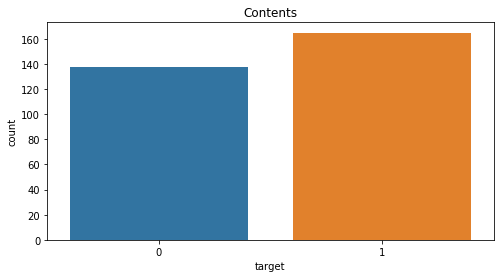

In [25]:
#Countplot for target
plt.figure(figsize=(8,4))
plt.title("Contents")
sns.countplot(x="target",data=data)

We see that the classes are not unbalanced.Good.

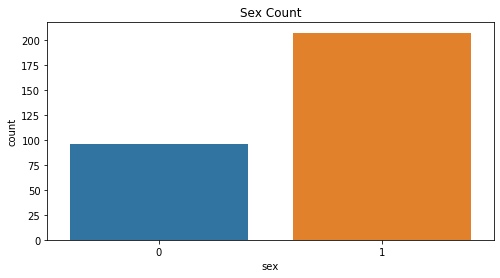

In [26]:
#Sex countplot
plt.figure(figsize=(8,4))
plt.title("Sex Count")
sns.countplot(x="sex",data=data)

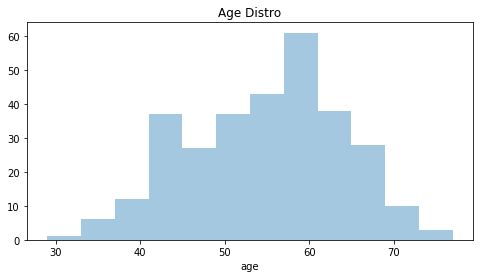

In [27]:
#Distribution of age
plt.figure(figsize=(8,4))
plt.title("Age Distro")
sns.distplot(a=data["age"],kde=False)

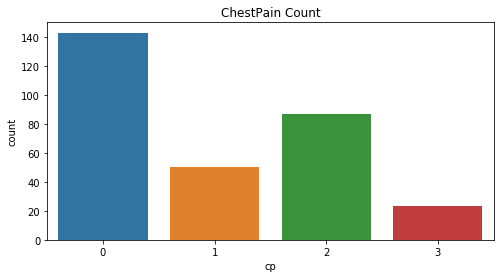

In [28]:
plt.figure(figsize=(8,4))
plt.title("ChestPain Count")
sns.countplot(x="cp",data=data)

Interesting ,almost half of the entries do not show any type of chest pain.In order to understand better the impact of chest pain we must check the people that actually have some heart disease.

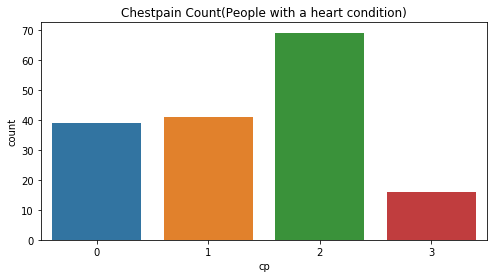

In [29]:
plt.figure(figsize=(8,4))
plt.title("Chestpain Count(People with a heart condition)")
sns.countplot(x="cp",data=data.loc[data["target"]==1])

Now we can see that most of the people with a heart disease show some form of chest pain.

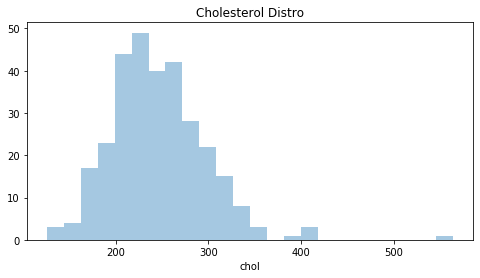

In [30]:
plt.figure(figsize=(8,4))
plt.title("Cholesterol Distro")
sns.distplot(a=data["chol"],kde=False)

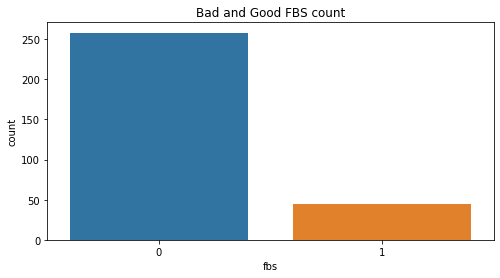

In [31]:
#Countplot for Levels of fast blood sugar
plt.figure(figsize=(8,4))
plt.title("Bad and Good FBS count")
sns.countplot(x="fbs",data=data)

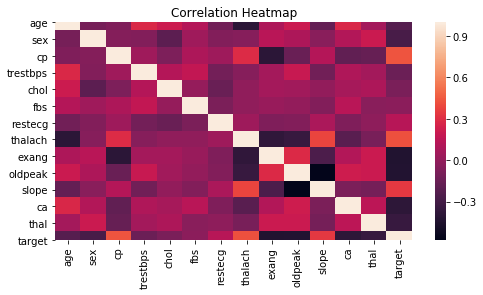

In [32]:
#Heatmap 
corr = data.corr()
plt.figure(figsize=(8,4))
plt.title("Correlation Heatmap")

sns.heatmap(corr)

# Modeling

In [33]:
features=["age","sex","cp","trestbps","chol","fbs"]
X=data[features]
y=data.target

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,f1_score,recall_score
model=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)

model.fit(X_train,y_train)


prediction=model.predict(X_valid)

print("The accuracy of the model is:\n",accuracy_score(y_valid,prediction))
print("The recall of the model is:\n",recall_score(y_valid,prediction))
print("The f1_score is:\n",f1_score(y_valid,prediction))

The accuracy of the model is:
 0.819672131147541
The recall of the model is:
 0.8529411764705882
The f1_score is:
 0.8405797101449276


In [36]:
#Let´s try some crossvalidation.
from sklearn.model_selection import cross_val_score
model_1 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
scores = cross_val_score(model,X,y,cv = 10,scoring='f1')
scores.mean()


0.7957434073691517